In [103]:
import gc
from xml.sax.handler import feature_string_interning
import caer
import canaro
import os
import cv2 as cv
import matplotlib.pyplot as plt
#import keras
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
import numpy as np
#import scipy

In [104]:
img_size = (80, 80)
channels = 1        #grey scale
char_path = r'C:\Git\apk-opencv\Database\training'

In [105]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

In [106]:
char_dict = caer.sort_dict(char_dict, descending=True)
print(char_dict)

[('BOLT', 238), ('NUT', 35), ('WASHER', 18)]


In [107]:
mech = []
cnt = 0
for i in char_dict:
    mech.append(i[0])
    cnt += 1
    if cnt >= 4:
        break
print(mech)

['BOLT', 'NUT', 'WASHER']


In [109]:
# Creating the ttraining data
train = caer.preprocess_from_dir(char_path, mech, channels=channels, IMG_SIZE=img_size, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 238 files found in 0.0s
[INFO] 35 files found in 0.0s
[INFO] 18 files found in 0.0s
----------------------------------------------
[INFO] 291 files preprocessed! Took 0m 16s


In [110]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=img_size)

In [111]:
featureSet = caer.normalize(featureSet)
labels = np_utils.to_categorical(labels, len(mech))

In [112]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [113]:
# freeing space
#del train, featureSet, labels
print(gc.collect())

0


In [114]:
Batch_size = 32
Epochs = 10

In [115]:
#image data generator

datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = Batch_size)

In [116]:
#creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=img_size, channels=channels, output_dim=len(mech), loss='binary_crossentropy', decay=1e-6, learning_rate= 0.001, momentum=0.9, nesterov=True)

In [117]:
#model.summary()

callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen, steps_per_epoch = len(x_train)//Batch_size, epochs = Epochs, validation_data = (x_val, y_val), validation_steps = len(y_val)//Batch_size, callbacks = callbacks_list)



Epoch 1/10
7/7 [==============================] - 6s 684ms/step - loss: 0.6437 - accuracy: 0.7588 - val_loss: 0.5792 - val_accuracy: 0.8833 - lr: 0.0100
Epoch 2/10
7/7 [==============================] - 5s 673ms/step - loss: 0.4365 - accuracy: 0.7990 - val_loss: 0.2704 - val_accuracy: 0.8833 - lr: 0.0100
Epoch 3/10
7/7 [==============================] - 5s 733ms/step - loss: 0.3887 - accuracy: 0.7946 - val_loss: 0.3514 - val_accuracy: 0.8833 - lr: 0.0100
Epoch 4/10
7/7 [==============================] - 6s 882ms/step - loss: 0.3532 - accuracy: 0.8040 - val_loss: 0.3021 - val_accuracy: 0.8833 - lr: 0.0100
Epoch 5/10
7/7 [==============================] - 5s 793ms/step - loss: 0.3555 - accuracy: 0.8040 - val_loss: 0.3233 - val_accuracy: 0.8833 - lr: 0.0100
Epoch 6/10
7/7 [==============================] - 5s 737ms/step - loss: 0.3656 - accuracy: 0.7889 - val_loss: 0.3180 - val_accuracy: 0.8833 - lr: 0.0100
Epoch 7/10
7/7 [==============================] - 5s 715ms/step - loss: 0.3425 - a

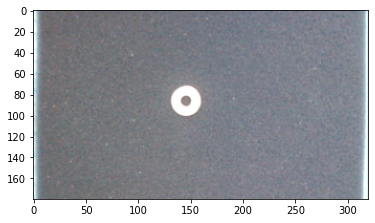

In [120]:
test_path = r'Database/testing/WIN_20220601_15_19_37_Pro.png'
img = cv.imread(test_path)
plt.imshow(img)

In [119]:
ret, img = cv.VideoCapture(1).read()

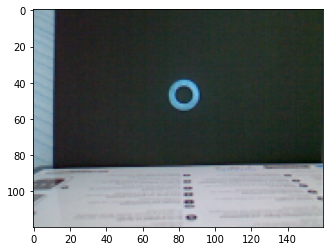

In [98]:
def rescaleFrame(img, scale = 0.25):
    width = int(img.shape[1] * scale)
    height = int(img.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(img, dimensions, interpolation = cv.INTER_AREA)
plt.imshow(rescaleFrame(img))

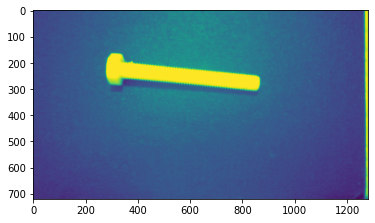

In [126]:
#img2 = cv.cvtColor(img, cv.COLOR_RGB2GRAY)#
img3 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img3)

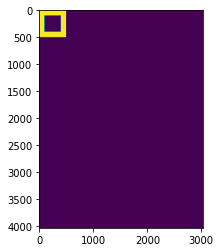

In [100]:
blank = np.zeros(img.shape[:2], dtype = 'uint8')
left = cv.rectangle(blank, (0,0), (100, 500),  (255, 255, 255), thickness= -1 )
right = cv.rectangle(blank, (400,500), (500, 0),  (255, 255, 255), thickness= -1 )
top = cv.rectangle(blank, (0,0), (500, 100),  (255, 255, 255), thickness= -1 )
bottom = cv.rectangle(blank, (500,500), (0, 400),  (255, 255, 255), thickness= -1 )
plt.imshow(blank)

In [89]:
#cv.size
def prepare(img):
    #img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, img_size)
    img = caer.reshape(img, img_size, channels=channels)
    return img

1/1 [==============================] - 0s 130ms/step
[[1. 0. 0.]]


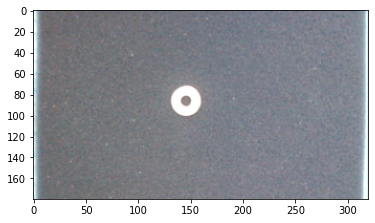

In [121]:
predictions = model.predict(prepare(img))
print(predictions)
plt.imshow(img)
plt.show()

In [122]:
print(mech[np.argmax(predictions[0])])

BOLT
